In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

## the following is an alternative way (other than sequencial way) to write the deep learning models in keras
## will be used more often in the future

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) ## convolution with kernel size 3x3, conducted for 32 times
x = layers.MaxPooling2D(pool_size=2)(x) ## max pooling with size 2x2 (and stride 2)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) ## convert data point from multiple matrices to a single vector
x = layers.Dense(64, activation="relu")(x) ## a fully connected layer
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 62s 65ms/step - loss: 0.1499 - accuracy: 0.9531
Epoch 2/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0427 - accuracy: 0.9870
Epoch 3/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0298 - accuracy: 0.9913
Epoch 4/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0211 - accuracy: 0.9935
Epoch 5/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0168 - accuracy: 0.9950


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}") ## keep three digits after the decimal

313/313 [==============================] - 3s 10ms/step - loss: 0.0272 - accuracy: 0.9927
Test accuracy: 0.993


Because of the usage of stochastic method, the test accuracy from your run can be a little bit different from the above number.

While our previous analysis with fully-connected network had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.2%: we decreased our error rate by 68% (relative).

In [ ]:
## One can add weight decay and dropout as in multi-layer neuron networks

from tensorflow.keras import regularizers ## you need to import regularizers first

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(inputs) ## add weight decay on convolution layer
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) ## convert data point from multiple matrices to a single vector
x = layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x) ## add weight decay on fully connected layer
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 128)         7385

In principle, one can add dropout in convolution as well, but this is NOT common in practice.

The regularization cannot be added to pooling layer (why?). The following code will return an error message.

x = layers.MaxPooling2D(pool_size=2, kernel_regularizer=regularizers.l2(0.001))(x) 

------------------------------------------------------------------------------






A comprehensive example of applying CNN on a small size dataset for image classification

In [ ]:
## Download cat vs dog data from Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"groupringfield","key":"fb8ceffca1c57cb740bfc6513e7e4069"}'}

In [ ]:
## create a folder to store the Kaggle key file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json ## this line makes sure only you can read the file (for security)

In [ ]:
## download and unzip the dataset
!kaggle competitions download -c dogs-vs-cats
!unzip -qq train.zip

 98% 534M/543M [00:03<00:00, 198MB/s]
100% 543M/543M [00:03<00:00, 177MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 90.4MB/s]
 93% 253M/271M [00:01<00:00, 184MB/s]
100% 271M/271M [00:01<00:00, 177MB/s]


In [ ]:
## split the whole dataset into training, validation and test sets
## create three folders, one for each set

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
## Data preprocessing
## We use `image_dataset_from_directory' to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
## specify CNN architecture

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [ ]:
## specify model fitting configuration
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
## Fit the model and record model fittig process (for tuning purpose)
## This modeling fitting can take a long time

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 170s 3s/step - loss: 0.7252 - accuracy: 0.5130 - val_loss: 0.6921 - val_accuracy: 0.5110
Epoch 2/30
63/63 [==============================] - 184s 3s/step - loss: 0.7130 - accuracy: 0.5740 - val_loss: 0.6456 - val_accuracy: 0.6010
Epoch 3/30
63/63 [==============================] - 174s 3s/step - loss: 0.6648 - accuracy: 0.6165 - val_loss: 0.6489 - val_accuracy: 0.6150
Epoch 4/30
63/63 [==============================] - 166s 3s/step - loss: 0.6254 - accuracy: 0.6660 - val_loss: 0.6087 - val_accuracy: 0.6670
Epoch 5/30
63/63 [==============================] - 171s 3s/step - loss: 0.5892 - accuracy: 0.7015 - val_loss: 0.5854 - val_accuracy: 0.6830
Epoch 6/30
63/63 [==============================] - 182s 3s/step - loss: 0.5526 - accuracy: 0.7065 - val_loss: 0.5787 - val_accuracy: 0.7040
Epoch 7/30
63/63 [==============================] - 179s 3s/step - loss: 0.5322 - accuracy: 0.7465 - val_loss: 0.6820 - val_accuracy: 0.6510
Epoch 8/30
63

We use a ModelCheckpoint callback to save the model after each epoch. We’ll configure it with the path specifying where to save the file, as well as the arguments save_best_only=True and monitor="val_loss": they tell the callback to only save a new file (overwriting any previous one) when the current value of the val_loss metric is lower than at any previous time during training. This guarantees that your saved file will always contain the state of the model corresponding to its best- performing training epoch, in terms of its performance on the validation data. As a result, we won’t have to retrain a new model for a lower number of epochs if we start overfitting: we can just reload our saved file.

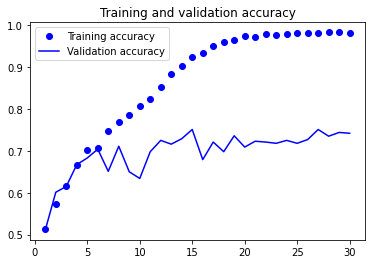

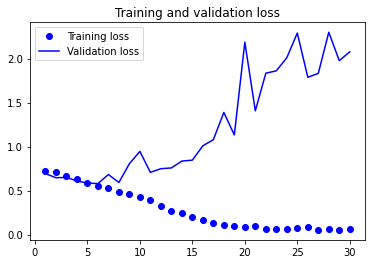

In [ ]:
## plot the model accuracies over epocs
## we can see the model starts to overfit the data from certain epoch

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
## Evaluating the model on the test set

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") ## keep 3 decimals after the point

63/63 [==============================] - 41s 637ms/step - loss: 0.6080 - accuracy: 0.6870
Test accuracy: 0.687


Use data augmentation to improve the model performance

In [ ]:
## Define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

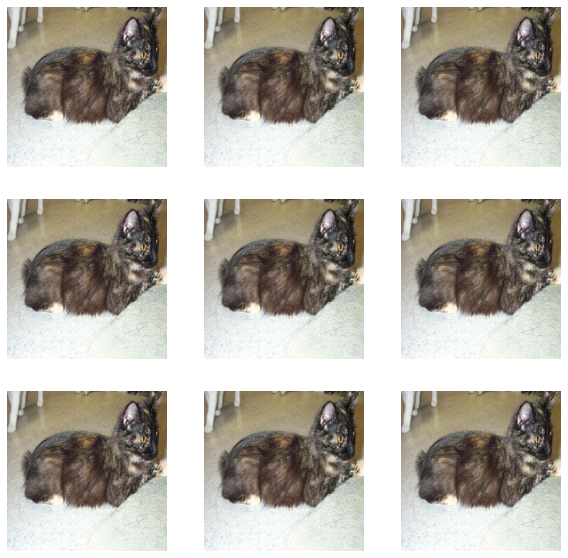

In [ ]:
## Displaying some randomly augmented training images
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
## specify a CNN including image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) ## data augmentation
x = layers.Rescaling(1./255)(x) ## standardize each image (all pixel values are between 0 and 1)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) ## add a dropout on fully connected layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
## fit the regularized CNN

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 179s 3s/step - loss: 0.7923 - accuracy: 0.5040 - val_loss: 0.6921 - val_accuracy: 0.5060
Epoch 2/100
63/63 [==============================] - 190s 3s/step - loss: 0.7087 - accuracy: 0.5115 - val_loss: 0.6891 - val_accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 205s 3s/step - loss: 0.7108 - accuracy: 0.5750 - val_loss: 0.6921 - val_accuracy: 0.5430
Epoch 4/100
48/63 [=====================>........] - ETA: 41s - loss: 0.6872 - accuracy: 0.5755

In [ ]:
## evaluate the model on test set

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

---------------------------------------------------------------------------

Use a pretrained model to improve CNN performance

In [ ]:
## Instantiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

In [ ]:
## Extract VGG16 features (without data augmentation) and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

In [ ]:
## Construct and fit a CNN with fully connected layer built on the extracted features

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

In [ ]:
## Show the model fitting results

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
## Use data augmentation together with feature extraction

Instantiating and freezing the VGG16 convolutional base
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
## Print the list of trainable weights before and after freezing

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
## Add a data augmentation in CNN

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
## fit the model

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
## evaluate on the test set

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

------------------------------------------------------------------------------
Fine-tuning a pre-trained model


In [ ]:
conv_base.summary()

In [ ]:
## Freeze all layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
## Fine-tune the model
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
## Evaluate the model on test set
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")